Project Introduction
This project aims to analyze traffic flow data to identify patterns, predict traffic conditions, and provide actionable insights for stakeholders. The analysis involves exploratory data analysis (EDA) and machine learning models to achieve these objectives.

Preprocessing: The Time and Date columns are converted to appropriate formats, and relevant features like Hour, Month, and Day are extracted.

Label Encoding: Categorical features like Day of the week and Traffic Situation are encoded to numerical values. Feature Selection: The features (Time, Day of the week, CarCount, etc.) are selected for training.

Model Training: A RandomForestClassifier is used to predict the traffic situation.

Evaluation: The model’s performance is evaluated using confusion matrix, classification report, and accuracy score.

Feature Importance: A plot showing the importance of each feature in predicting the traffic situation is generated.

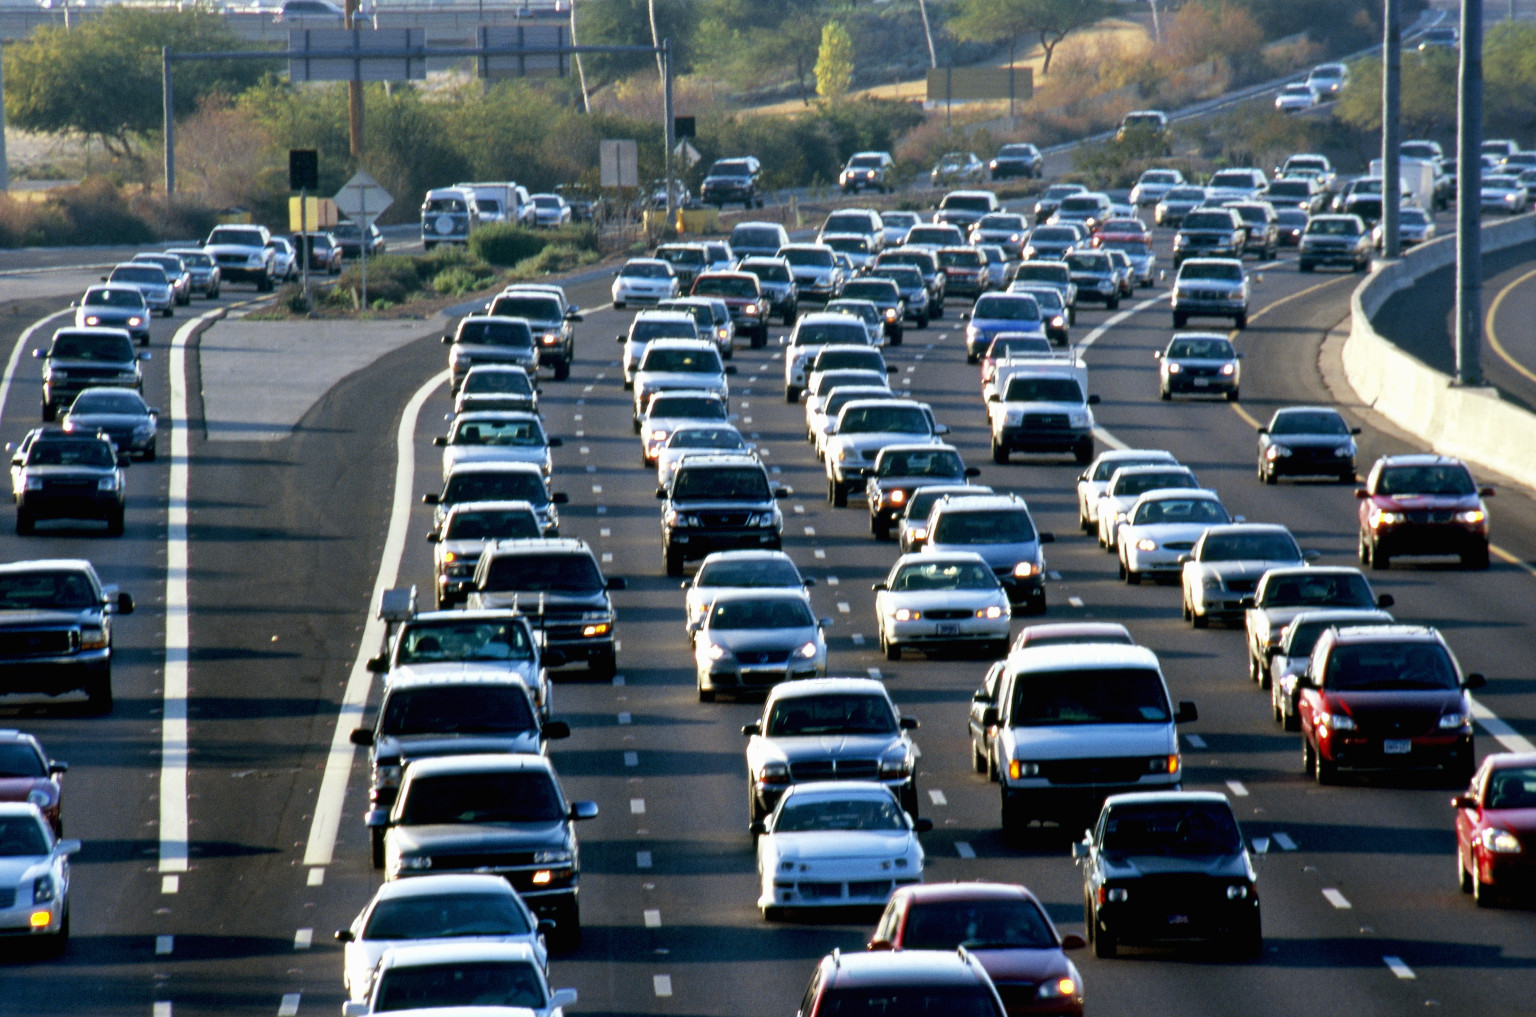

In [3]:
import pandas as pd
df = pd.read_csv('TrafficDataset.csv')

# Display the first few rows of the dataframe
df.head()

Time        Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM  10-10-2023         Tuesday        13          2         2   
1  12:15:00 AM  10-10-2023         Tuesday        14          1         1   
2  12:30:00 AM  10-10-2023         Tuesday        10          2         2   
3  12:45:00 AM  10-10-2023         Tuesday        10          2         2   
4   1:00:00 AM  10-10-2023         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal

In [4]:
df.shape

(2976, 9)

In [5]:
df.dtypes

Time                 object
Date                 object
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [6]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute
df['Time'].unique()

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425], dtype=int32)

In [8]:
df['Date'].unique()

array(['10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023',
       '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023',
       '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023',
       '30-10-2023', '31-10-2023', '01-11-2023', '02-11-2023',
       '03-11-2023', '04-11-2023', '05-11-2023', '06-11-2023',
       '07-11-2023', '08-11-2023', '09-11-2023'], dtype=object)

In [10]:
print("Raw Date Data:")
print(df['Date'].head(10))

# Convert 'Date' to datetime format (dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any missing values or incorrect parsing
print("\nConverted Date Data:")
print(df['Date'].head(10))
print("Missing values in 'Date':", df['Date'].isna().sum())

# Convert to days since a reference date
reference_date = pd.Timestamp('2023-10-09')
df['Date'] = (df['Date'] - reference_date).dt.days

# Verify the final result
print("\nFinal Date Data:")
print(df.dtypes)
print(df.head())
print(df.tail())

Raw Date Data:
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Date, dtype: int64

Converted Date Data:
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: Date, dtype: datetime64[ns]
Missing values in 'Date': 2976

Final Date Data:
Time                   int32
Date                 float64
Day of the week       object
CarCount               int64
BikeCount              int64
BusCount               int64
TruckCount             int64
Total                  int64
Traffic Situation     object
dtype: object
   Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0     0   NaN         Tuesday        13          2         2          24   
1    15   NaN         Tuesday        14          1         1          36   
2    30   NaN         Tuesday        10          2         2          32   
3    45   NaN         Tuesday        10          2         2          36   
4    60   NaN         Tuesday        11          2

In [11]:
df['Traffic Situation'].unique()



array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Traffic Situation' to numerical values
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

In [15]:
df.describe()

Time  Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000   0.0  2976.000000  2976.000000  2976.000000  2976.000000   
mean    712.500000   NaN    62.184812     9.405578    10.546371    21.967742   
std     415.739495   NaN    43.384148     9.275747     9.774527    10.312510   
min       0.000000   NaN     5.000000     0.000000     0.000000     5.000000   
25%     356.250000   NaN    15.000000     2.000000     2.000000    13.000000   
50%     712.500000   NaN    61.000000     7.000000     8.000000    21.000000   
75%    1068.750000   NaN    97.000000    15.000000    17.000000    30.000000   
max    1425.000000   NaN   150.000000    50.000000    40.000000    60.000000   

             Total  Traffic Situation  
count  2976.000000        2976.000000  
mean    104.104503           2.329637  
std      50.972085           1.120568  
min      25.000000           0.000000  
25%      53.000000           2.000000  
50%     101.000000           3.000000  
75%     144.000000           3.000000  
max     227.000000           3.000000

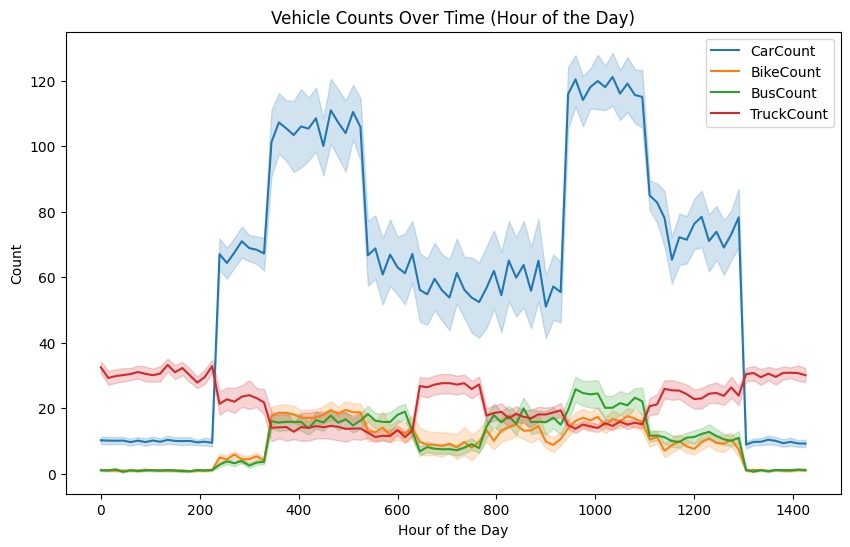

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

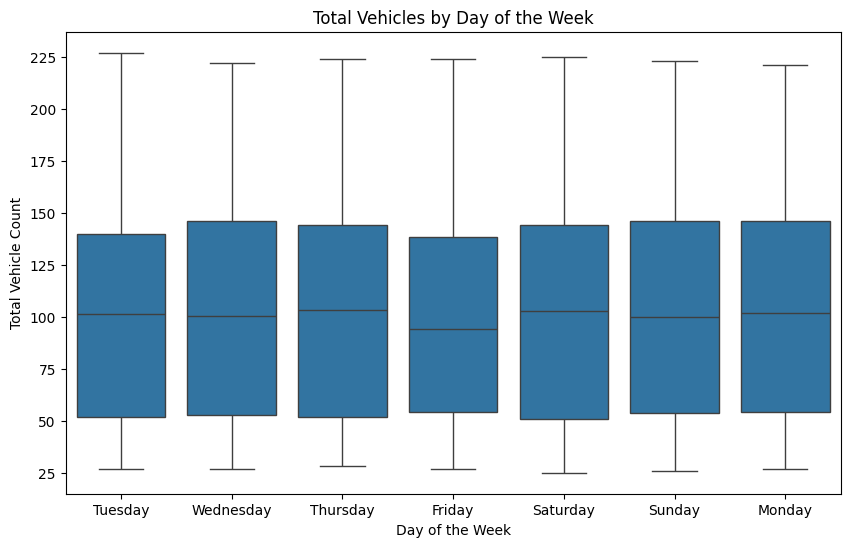

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of the week', y='Total')
plt.title('Total Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.show()

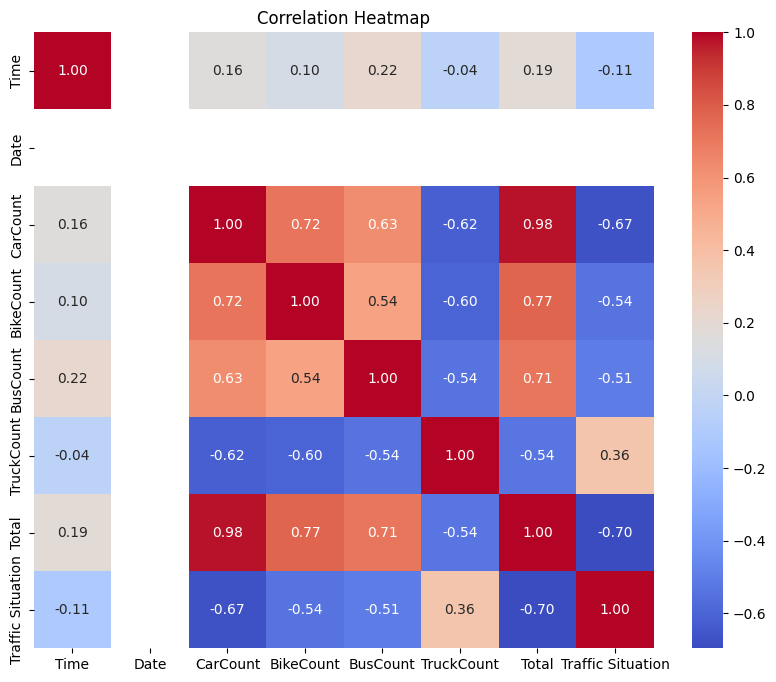

In [23]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

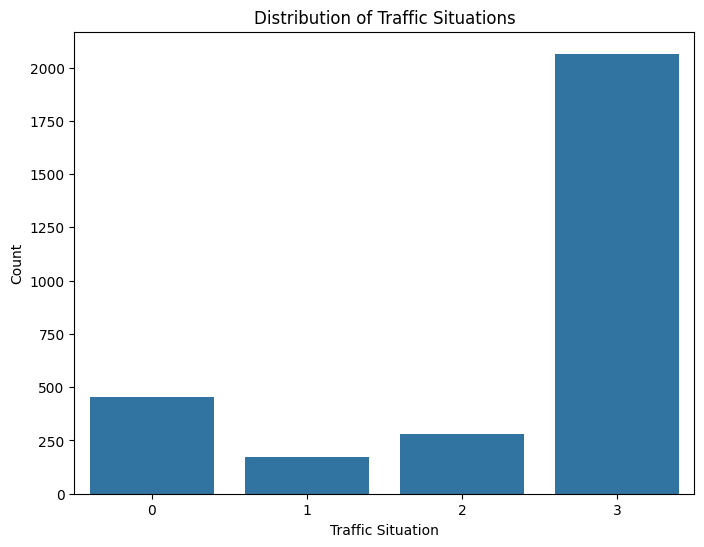

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

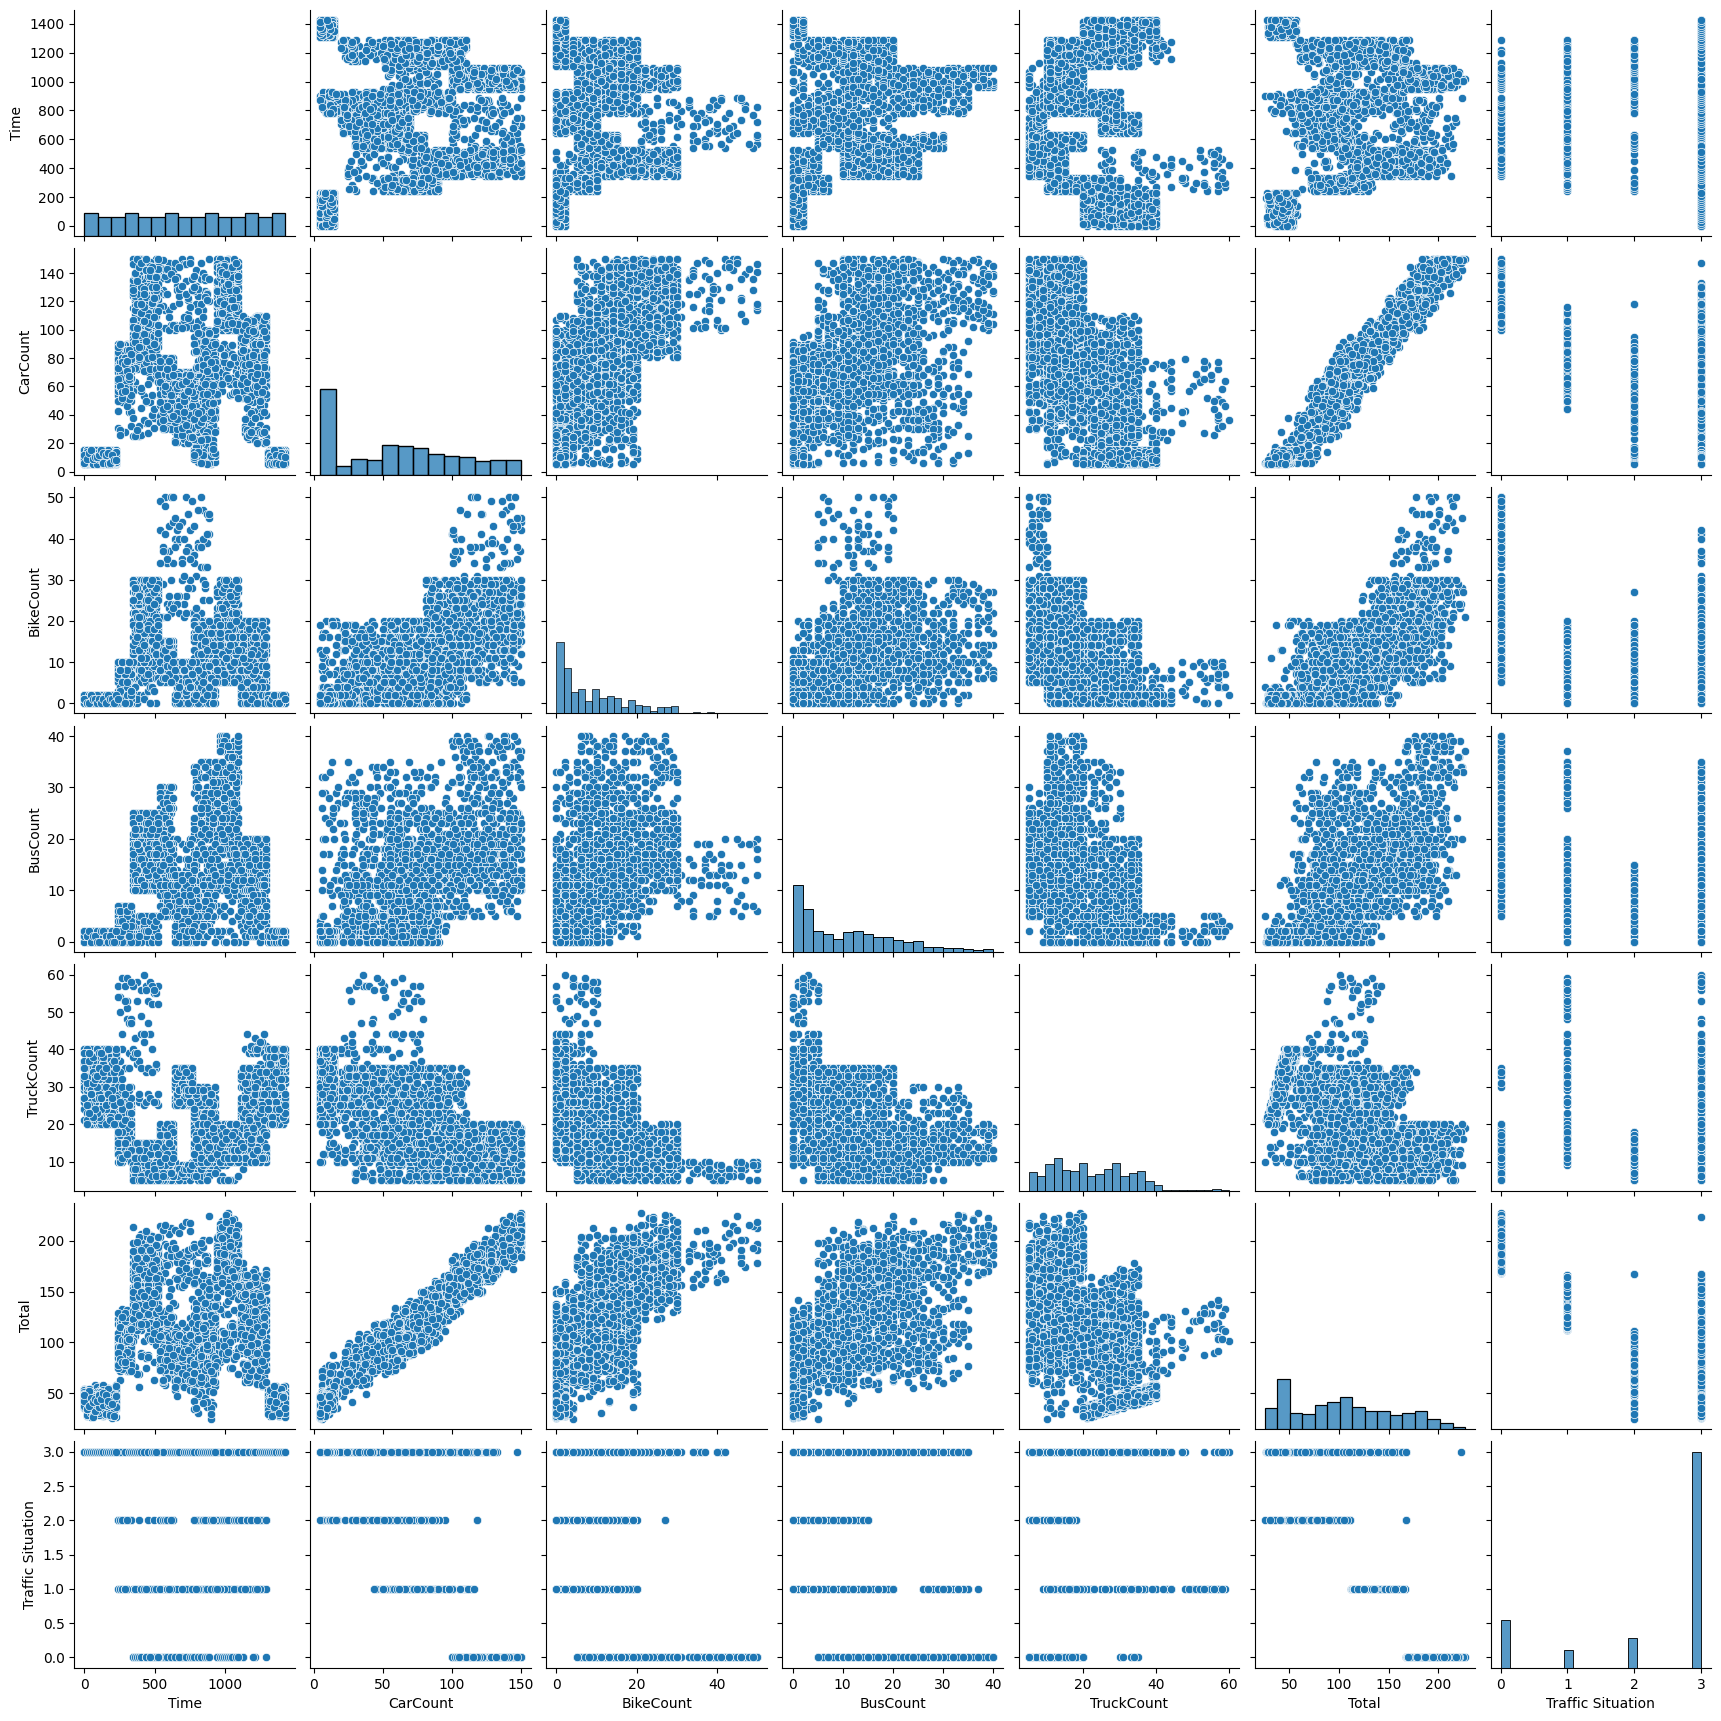

In [25]:
sns.pairplot(df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])
plt.show()

C:\Users\matha\AppData\Local\Temp\ipykernel_25648\1026026105.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')


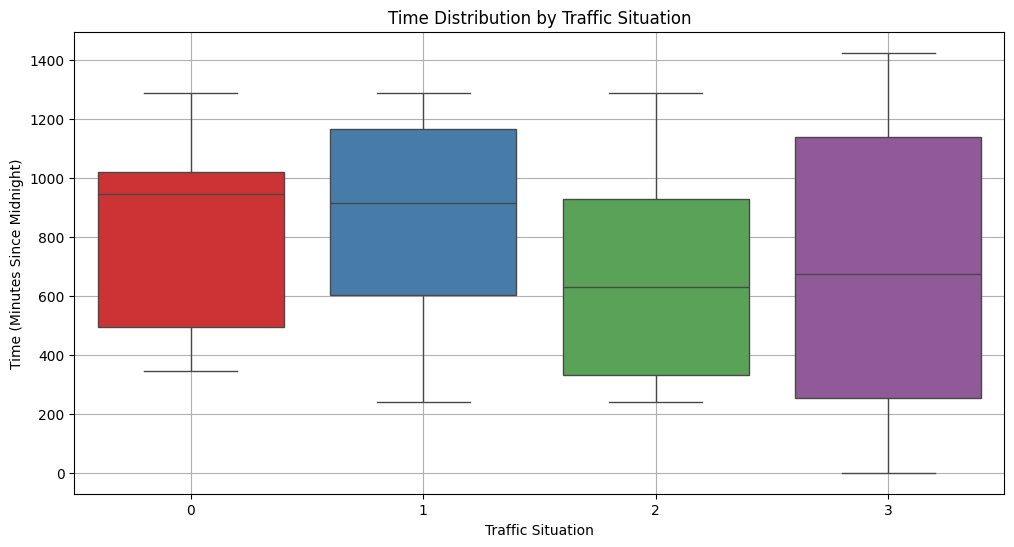

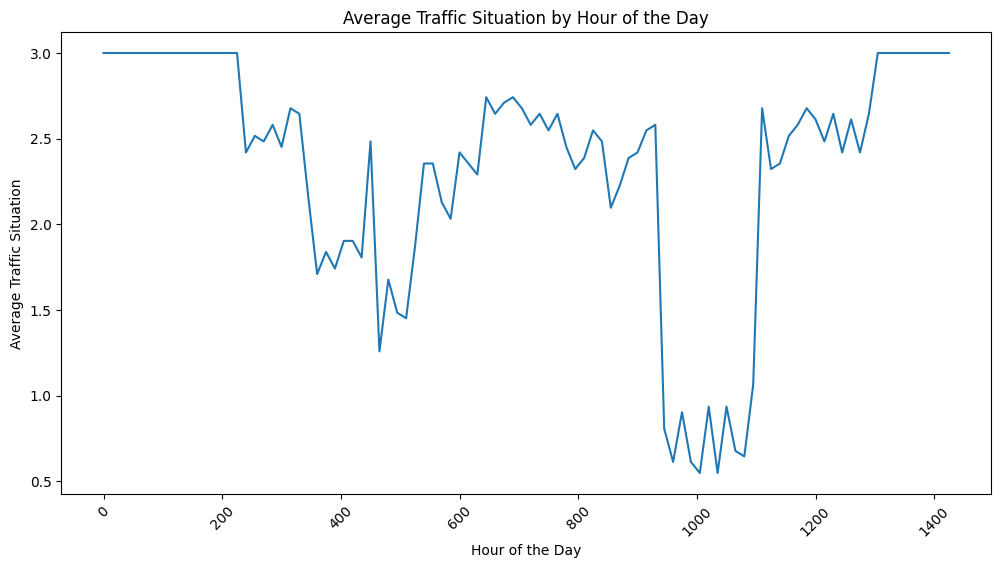

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Traffic Situation' to categorical
df['Traffic Situation'] = pd.Categorical(df['Traffic Situation']).codes

# Create a box plot to show distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')
plt.title('Time Distribution by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Time (Minutes Since Midnight)')
plt.grid(True)
plt.show()

# Alternatively, a line plot to show average traffic situation over the hours
plt.figure(figsize=(12, 6))
avg_traffic_by_time = df.groupby('Time')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [35]:
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

# Select features and target
X = df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Date']]
y = df['Traffic Situation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

c:\Users\matha\OneDrive\Desktop\Traffic-Flow-Prediction\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\matha\OneDrive\Desktop\Traffic-Flow-Prediction\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\matha\OneDrive\Desktop\Traffic-Flow-Prediction\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Confusion Matrix:
 [[ 79   1   0   6]
 [  2  28   0   9]
 [  1   0  52   0]
 [  7   1   3 407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        86
           1       0.93      0.72      0.81        39
           2       0.95      0.98      0.96        53
           3       0.96      0.97      0.97       418

    accuracy                           0.95       596
   macro avg       0.93      0.90      0.91       596
weighted avg       0.95      0.95      0.95       596

Accuracy Score: 0.9496644295302014


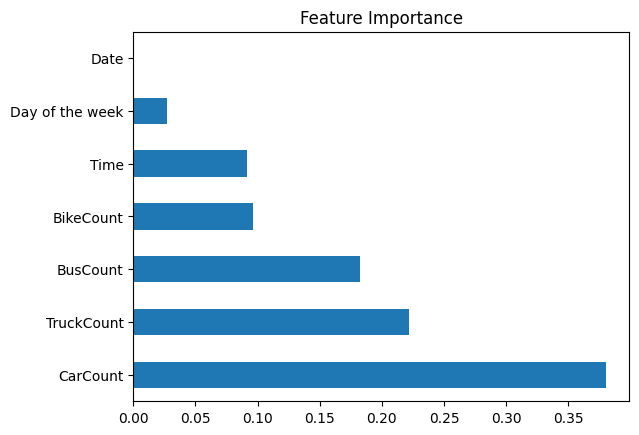

In [36]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Conclusion
The Traffic Flow Prediction project provides critical insights into traffic patterns, highlighting peak congestion times and the impact of external factors such as weather or road conditions. By analyzing time-based traffic situations, the model identifies trends that can assist traffic authorities in managing congestion more effectively. The ability to predict traffic flow enables stakeholders to implement proactive measures, such as optimizing signal timings, adjusting public transport schedules, and planning road maintenance during low-traffic periods. These predictions can also support real-time traffic monitoring and alert systems, allowing for dynamic rerouting and minimizing disruptions during high-traffic periods.

Moreover, this project has broader implications for smart city integration and sustainability. By incorporating predictive traffic data, city planners can design more efficient road networks and reduce congestion, which in turn lowers vehicle emissions and fuel consumption. This contributes to environmental goals while also boosting economic productivity by reducing time spent in traffic. Ultimately, the traffic flow prediction model offers a data-driven approach to improving urban mobility, enhancing resource allocation, and fostering a more efficient and sustainable transportation ecosystem.